In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
class LinearRegressionUsingGD:
    """
    eta : Learning rate
    n_iterations : No of passes over the training set
    
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration
    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """
        Input parameters
        -------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
            
        Returns
        -------
        self : object
        """

        self.cost_ = []
        x = np.concatenate((x, np.ones((x.shape[0],1))), axis=1)
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """ 
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        x = np.concatenate((x, np.ones((x.shape[0],1))), axis=1)
        
        return np.dot(x, self.w_)

Text(0, 0.5, 'y')

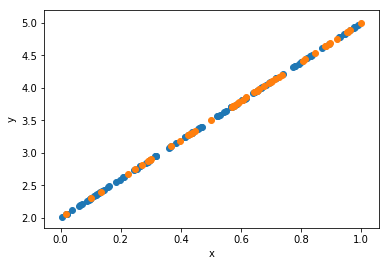

In [3]:
# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x #+ np.random.rand(100, 1)

x1 = np.random.rand(50, 1)
y1 = 2 + 3 * x1 #+ np.random.rand(50, 1)

# plot
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.xlabel('x')
plt.ylabel('y')

In [4]:
linear_regression_model = LinearRegressionUsingGD()
linear_regression_model.fit(x, y)
y_pred = linear_regression_model.predict(x)
y1_pred = linear_regression_model.predict(x1)

In [5]:
# procena tacnosti modela

# residual sum of squares
rss = np.sum((y_pred - y)**2)
rss1 = np.sum((y1_pred - y1)**2)

#  total sum of squares
tss = np.sum((y - np.mean(y))**2)
tss1 = np.sum((y1 - np.mean(y1))**2)

# R2 score
r2_score = 1 - (rss/tss)
print('R2 score trng: ', r2_score)
r2_score1 = 1 - (rss1/tss1)
print('R2 score test: ', r2_score1)

R2 score trng:  0.9996592553760387
R2 score test:  0.9996294190025495


In [6]:
coeffs = linear_regression_model.w_
print(coeffs)

[[2.94500288]
 [2.02787112]]


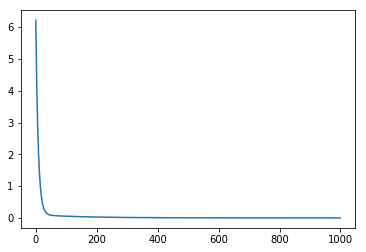

In [7]:
cost_function = linear_regression_model.cost_

fig=plt.figure()
plt.plot(np.arange(len(cost_function)), cost_function)

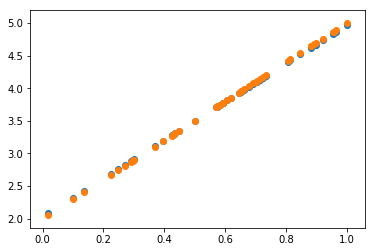

In [8]:
plt.scatter(x1,y1_pred)
plt.scatter(x1,y1)